In [1]:
import pandas as pd
import nibabel as nib
from nilearn import datasets, plotting, image
import os
import json
import pandas as pd

In [2]:
def get_subject_data(dataset_dir, subject_idx):
    """ Get the participant id, phenotypic information, anatomical image, and functional image 
    for a subject in the directory
    """
    subjects_dirs = [os.path.join(dataset_dir, subject) for subject in sorted(os.listdir(dataset_dir)) if os.path.isdir(os.path.join(dataset_dir, subject)) and not subject.startswith('.')]
    
    # Get subject directory and initialize subject data
    subject_dir = os.path.join(dataset_dir, subjects_dirs[subject_idx])
    subject_data = {}
    
    # Add subject's participant id
    subject_data['participant_id'] = subjects_dirs[subject_idx].split('-')[-1]
    if len(subject_data['participant_id']) == 5:
        subject_data['participant_id'] = subject_data['participant_id'][-4:]
    
    # Add subject's phenotypic information
    participants = pd.read_csv(os.path.join(dataset_dir, 'participants.tsv'),sep='\t')
    subject_data['phenotypic'] = participants.loc[participants['participant_id'] == 'sub-'+subject_data['participant_id']]
    
    # Load anatomical and functional images
    for mode in ['anat', 'func']:
        mode_dir = os.path.join(subject_dir, mode)
        img_name = [each for each in os.listdir(mode_dir) if each.endswith('.gz')][0]
        img_path = os.path.join(mode_dir, img_name)
        img = nib.load(img_path)
        subject_data[mode] = img
        
    return(subject_data)

In [3]:
# Change dataset directory
dataset_dir = "/home/thomas/Documents/Brainhack_School/7_open_data/ds003763-download" # "/home/thomas/ds003763-download"

In [4]:
# Description of the dataset
with open(os.path.join(dataset_dir, 'dataset_description.json'), 'r') as description_file:
    dataset_description = json.load(description_file)
    for key in dataset_description:
        print(key + ':', dataset_description[key])

Name: Interoception during aging: The heartbeat detection task
BIDSVersion: 1.2.1
License: CC0
Authors: ['Olga R. Dobrushina', 'Larisa A. Dobrynina', 'Galina A. Arina', 'Maria V. Gubanova', 'Anastasia V. Belopasova', 'Evgenia S. Novikova', 'Anastasia D. Suslina', 'Elena I. Kremneva', 'Ekaterina V. Pechenkova', 'Marina V. Krotenkova']
Acknowledgements: The authors thank the administration of Neurology Research Center for the assistance with organisation of the study.
HowToAcknowledge: This dataset was provided by Olga R. Dobrushina, Larisa A. Dobrynina, Galina A. Arina, Maria V. Gubanova, Anastasia V. Belopasova, Evgenia S. Novikova, Anastasia D. Suslina, Elena I. Kremneva, Ekaterina V. Pechenkova, Marina V. Krotenkova
Funding: ['This research recieved no external funding.']
ReferencesAndLinks: ['Here will be journal references']
DatasetDOI: 10.18112/openneuro.ds003763.v1.0.0


In [5]:
# Change subject index in the dataset and get data
subject_idx = 0
subject_data = get_subject_data(dataset_dir, subject_idx)

In [6]:
# Subject phenotypic information
subject_data['phenotypic']

,participant_id,age,sex,IAcc,mislocalization,drift_emerg_30,drift_emerg_60,drift_emerg_120,drift_emerg_240,drift_fading_15,...,test_own_15,test_own_30,test_own_60,test_own_120,test_own_240,control_own_15,control_own_30,control_own_60,control_own_120,control_own_240
28,sub-9113,53,f,0.35,-7.0,0.57,1.8,4.1,3.27,1.93,...,4.43,-9.0,4.0,3.0,8.0,-9.0,-9.0,-9.0,-9.0,-9.0


/home/thomas/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



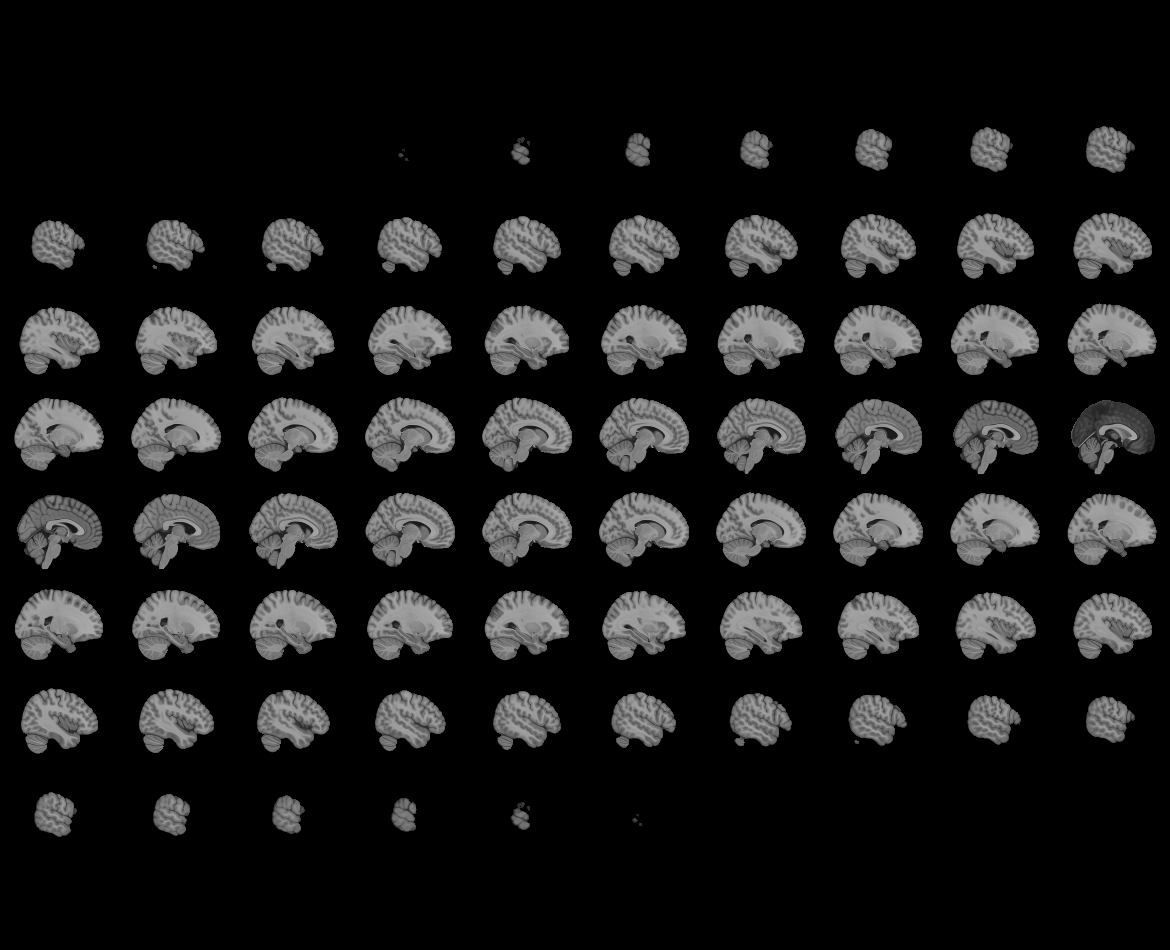
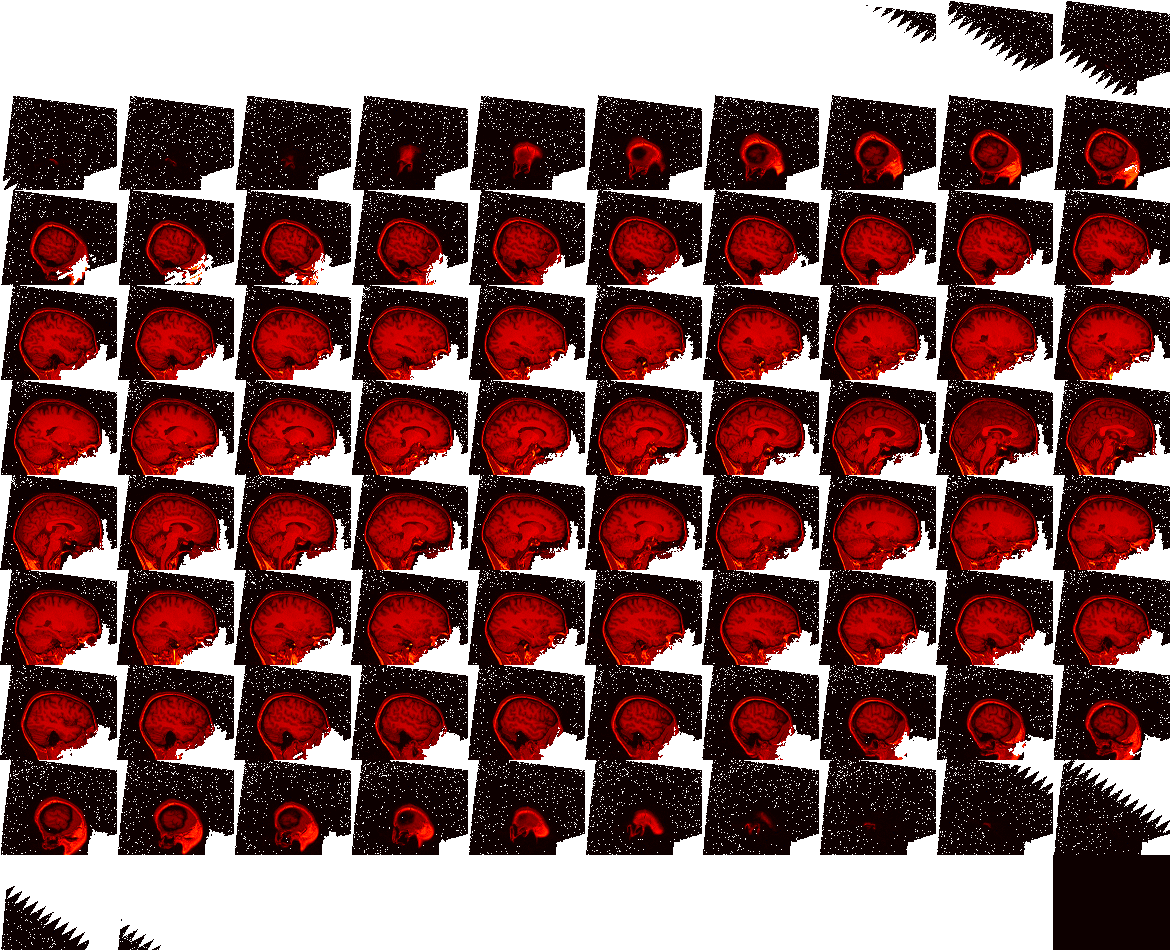

In [7]:
# Take a look at the anatomical image
plotting.view_img(subject_data['anat'])

/home/thomas/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/thomas/miniconda3/lib/python3.10/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")



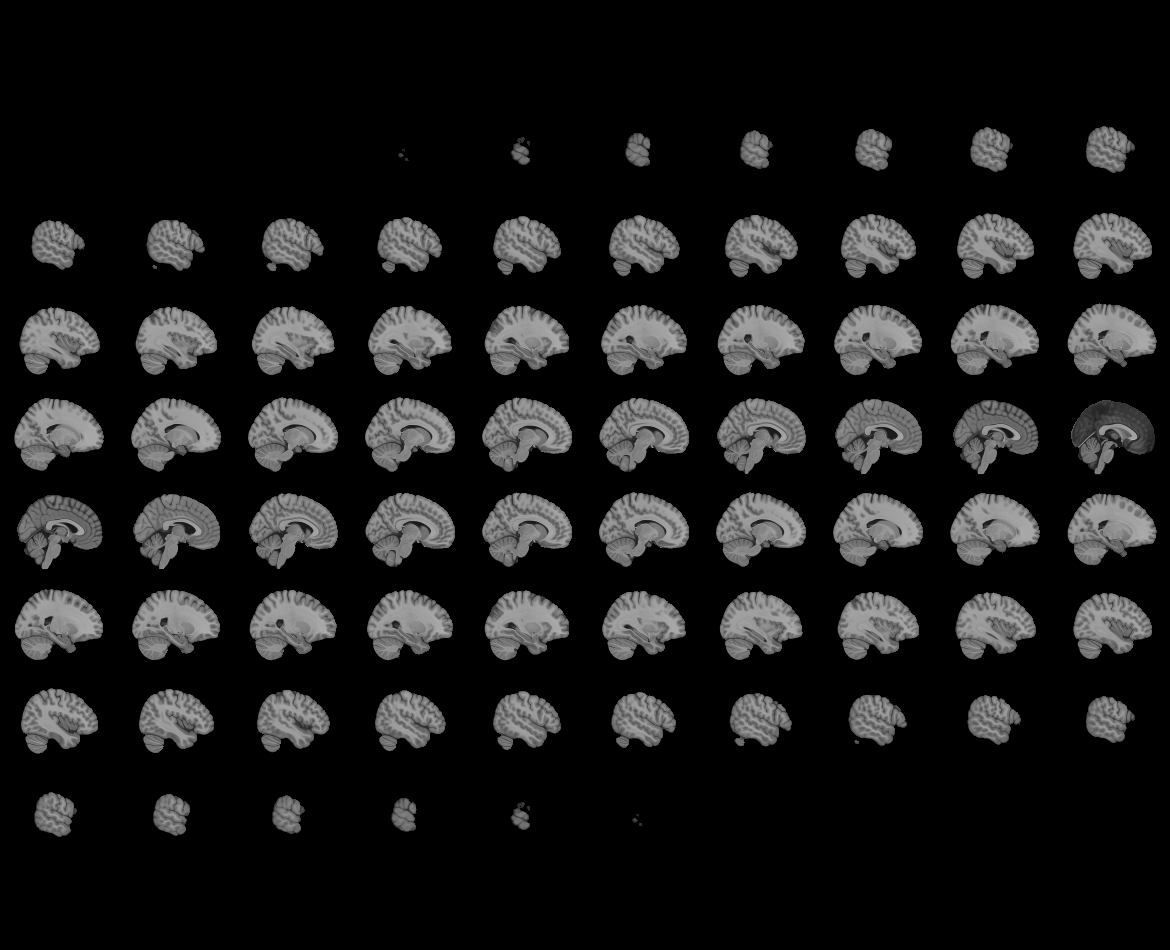
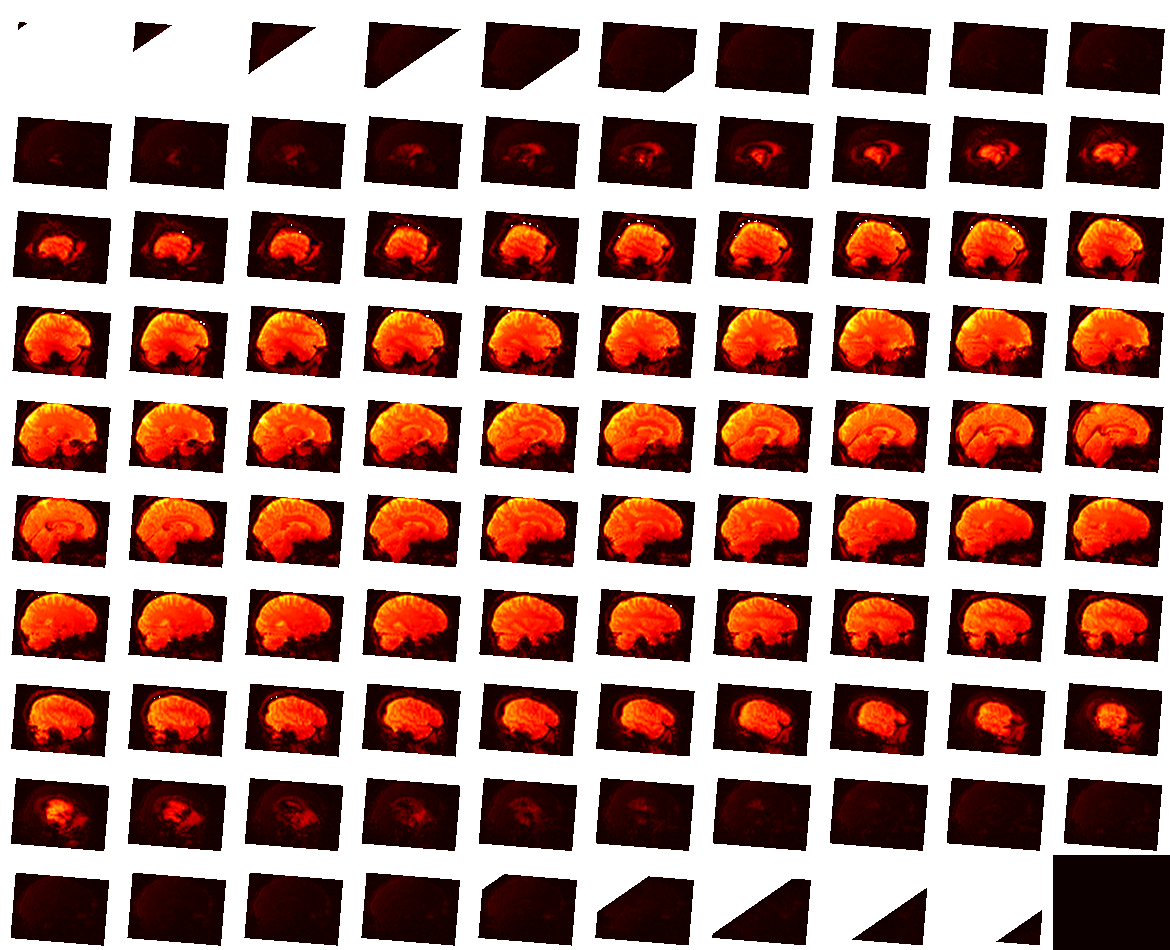

In [8]:
# Take a look at the first time point of the functional image
plotting.view_img(image.index_img(subject_data['func'], 2))